Import Libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Iris (1).csv" , names = ['id', 'sepalLength', 'sepalWidth' , 'petalLength', 'petalWidth' , 'species'])

In [5]:
df.head()

,id,sepalLength,sepalWidth,petalLength,petalWidth,species
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


Issues:
drop first row
drop id column as it is not significant

In [6]:
df.drop(0, axis = 0 , inplace = True)

In [7]:
df.head()

,id,sepalLength,sepalWidth,petalLength,petalWidth,species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           150 non-null    object
 1   sepalLength  150 non-null    object
 2   sepalWidth   150 non-null    object
 3   petalLength  150 non-null    object
 4   petalWidth   150 non-null    object
 5   species      150 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


Issue:
numerical datas have dtype object. So, we have to convert it to float dtype

In [9]:
df[['sepalLength' , 'sepalWidth' , 'petalLength' , 'petalWidth' ]]  = df[['sepalLength' , 'sepalWidth' , 'petalLength' , 'petalWidth' ]].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           150 non-null    object 
 1   sepalLength  150 non-null    float64
 2   sepalWidth   150 non-null    float64
 3   petalLength  150 non-null    float64
 4   petalWidth   150 non-null    float64
 5   species      150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [11]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

array([[<Axes: title={'center': 'sepalLength'}>,
        <Axes: title={'center': 'sepalWidth'}>],
       [<Axes: title={'center': 'petalLength'}>,
        <Axes: title={'center': 'petalWidth'}>]], dtype=object)

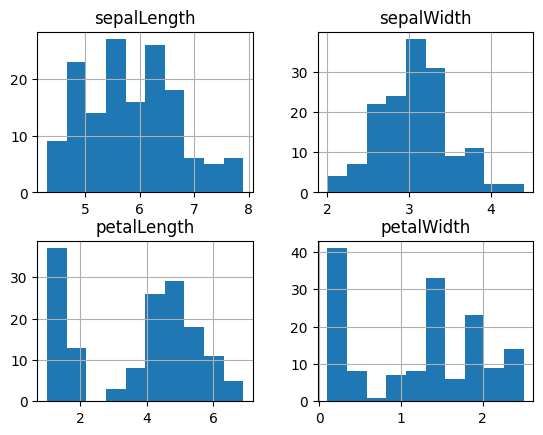

In [13]:
df.hist()

C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


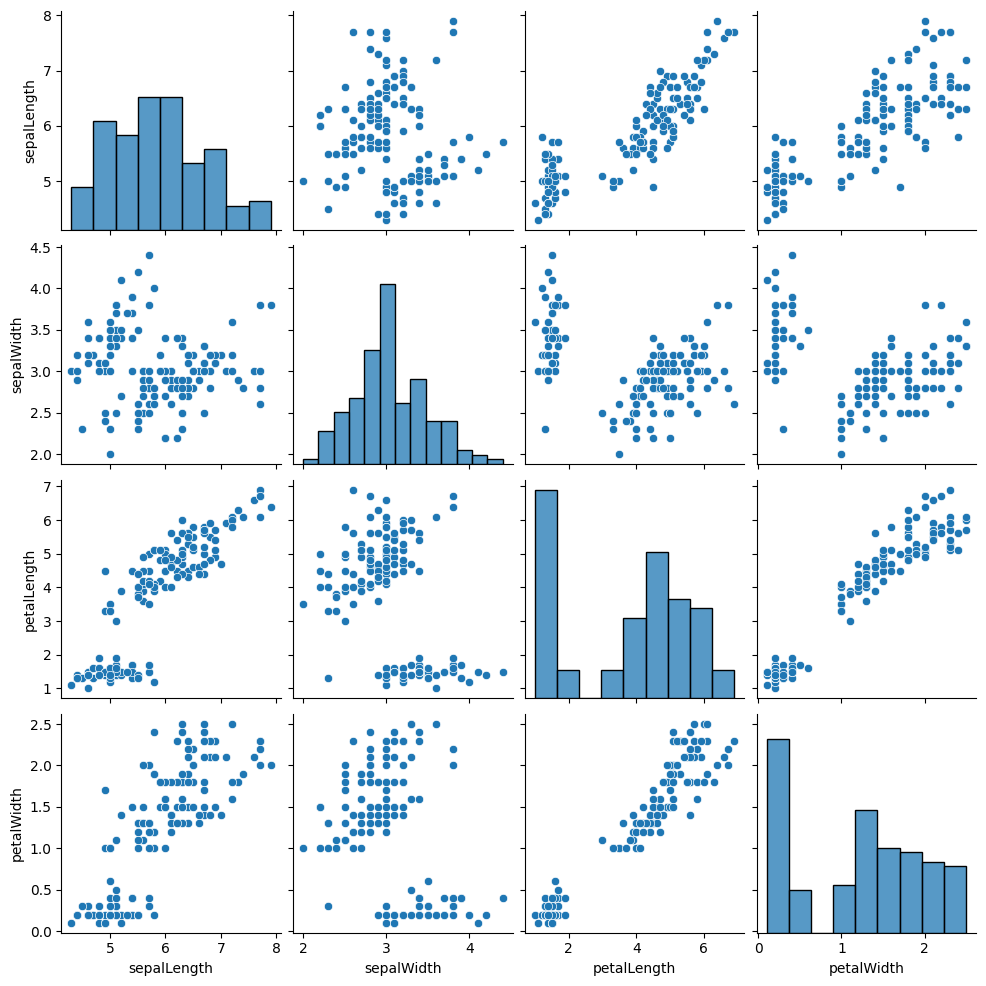

In [14]:
sns.pairplot(data = df)

# Heatmap

In [15]:
sns.heatmap(df.corr() , annot = True)

ValueError: could not convert string to float: 'Iris-setosa'

# Preparing Data

In [16]:
from sklearn.compose import ColumnTransformer

In [17]:
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [18]:
label = LabelEncoder()

In [19]:
df['species'] =  label.fit_transform(df['species'])

In [20]:
df.head()

,id,sepalLength,sepalWidth,petalLength,petalWidth,species
1,1,5.1,3.5,1.4,0.2,0
2,2,4.9,3.0,1.4,0.2,0
3,3,4.7,3.2,1.3,0.2,0
4,4,4.6,3.1,1.5,0.2,0
5,5,5.0,3.6,1.4,0.2,0


## Let's split the features and label

In [21]:
x = df.drop('species' , axis = 1)

In [22]:
y = df['species']

In [23]:
scalar = ColumnTransformer([
    ('droper' , 'drop' , ['id']),
    ('scalar' , StandardScaler() , slice(0,-1))

], remainder='passthrough')

In [35]:
inv = label.inverse_transform()

TypeError: LabelEncoder.inverse_transform() missing 1 required positional argument: 'y'

## Test train split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size = 0.4, random_state = 42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline


In [27]:
dtc = DecisionTreeClassifier()
decision_tree_pipe = Pipeline([
  ('scaler', scalar),
  ('model' , dtc)
])


In [28]:
decision_tree_pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('droper', 'drop', ['id']),
                                                 ('scalar', StandardScaler(),
                                                  slice(0, -1, None))])),
                ('model', DecisionTreeClassifier())])

In [29]:
y_pred = decision_tree_pipe.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [31]:
matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

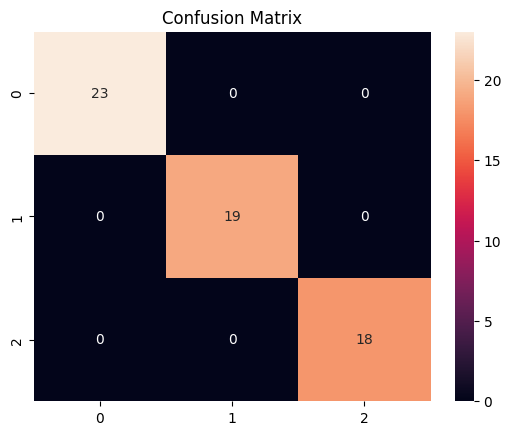

In [32]:
sns.heatmap(matrix, annot = True)
plt.title("Confusion Matrix")

In [33]:
import pickle

In [34]:
pickle.dump(decision_tree_pipe, open("pipe.pkl", 'wb'))